## Ablation study on the components of the loss funcion

/tmp/ipykernel_1098523/1169140560.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(mean_df.columns))


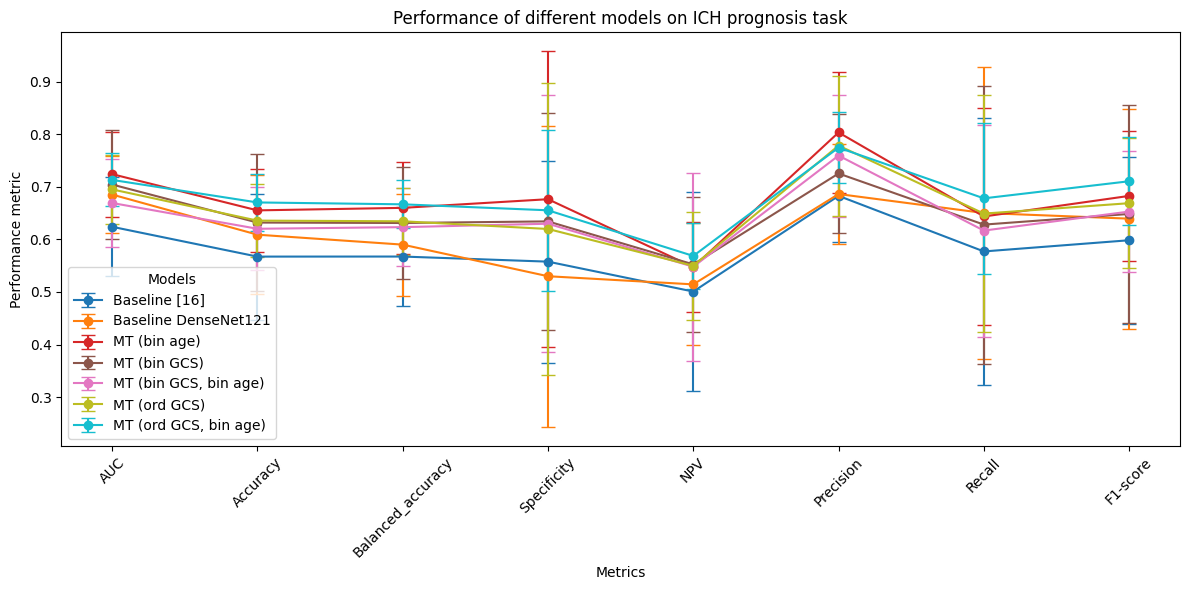

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
metrics=['AUC', 'Accuracy', 'Balanced_accuracy', 'Specificity', 'NPV', 'Precision', 'Recall', 'F1-score']
# read results dataframe for each of the models
binaryGCS_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BinaryGCS_Prognosis/fold_metrics_df_BinaryGCS_Prognosis_SAME_LOSS_PARAM_MulticlassOutput.csv')
binaryGCS_BinaryAge_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BinaryGCS_BinaryAge_Prognosis/fold_metrics_df_BinaryGCSBinaryAge_Prognosis_MulticlassOutput.csv')
binaryGCS_binaryAge_prognosis_SAME_LOSS_HP = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BinaryGCS_BinaryAge_Prognosis_SAME_LOSS_PARAM/fold_metrics_df_BinGCS_BinAge_Prog_SAME_LOSS_PARAM_MulticlassOutput_RevisedCI.csv')
binaryAge_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BinaryAge_Prognosis/fold_metrics_df_BinaryAge_Prognosis_MulticlassOutput.csv')
threeClassGCS_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_Prognosis_SAME_LOSS_PARAM/fold_metrics_df_ThreeClassGCS__SAME_LOSS_PARAM_DenseNet_MulticlassOutput.csv')
threeClassGCS_BinaryAge_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_BinaryAge_Prognosis_SameHP/fold_metrics_df_ThreeClassGCS_BinaryAge_Prognosis_SAMEPARAMETERS_asBinaryGCS_BinaryAge_Prognosis_No_pos_weight.csv')
baselineAmaia = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BaselineAmaia/fold_metrics_df_RepeatCI_Test_BaselineAmaia_Prognosis301_40.csv')
baseline = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BaselineDenseNet_Prognosis/Dropout0.2WeightDecay0.0001/fold_metrics_df_RepeatCI_Test_BaselineDenseNet_Prognosis301_40_Dropout0.2WeightDecay0.0001.csv')
# Calculate the mean and std of the metrics for each model
mean_std_data = {}
# models = ['Baseline [16]', 'Baseline', 'MT (bin age)', 'MT (bin GCS)', 'MT (bin GCS & bin age)', 'MT (bin GCS & bin age) SAME LOSS HP', 'MT (ord GCS)', 'MT (ord GCS & bin age)']
# dataframes = [baselineAmaia, baseline, binaryAge_prognosis, binaryGCS_prognosis, binaryGCS_BinaryAge_prognosis, binaryGCS_binaryAge_prognosis_SAME_LOSS_HP, threeClassGCS_prognosis, threeClassGCS_BinaryAge_prognosis]

models = ['Baseline [16]', 'Baseline DenseNet121', 'MT (bin age)', 'MT (bin GCS)', 'MT (bin GCS, bin age)', 'MT (ord GCS)', 'MT (ord GCS, bin age)']
dataframes = [baselineAmaia, baseline, binaryAge_prognosis, binaryGCS_prognosis, binaryGCS_binaryAge_prognosis_SAME_LOSS_HP, threeClassGCS_prognosis, threeClassGCS_BinaryAge_prognosis]


for model_name, df in zip(models, dataframes):
    means = df[metrics].mean()
    stds = df[metrics].std()
    mean_std_data[model_name] = (means, stds)

# Create a dataframe to store the calculated statistics
mean_df = pd.DataFrame({model: data[0] for model, data in mean_std_data.items()}, index=metrics)
std_df = pd.DataFrame({model: data[1] for model, data in mean_std_data.items()}, index=metrics)

# Plot the performance of each model in a line plot with error bars
fig, ax = plt.subplots(figsize=(12, 6))

colors = plt.cm.get_cmap('tab10', len(mean_df.columns))

for i, model in enumerate(mean_df.columns):
    ax.errorbar(mean_df.index, mean_df[model], yerr=std_df[model], fmt='o-', label=model, capsize=5, color=colors(i))

ax.set_ylabel('Performance metric')
ax.set_xlabel('Metrics')
ax.set_title('Performance of different models on ICH prognosis task')
plt.xticks(rotation=45)
plt.legend(title='Models', loc='best')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1098523/2814423615.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))


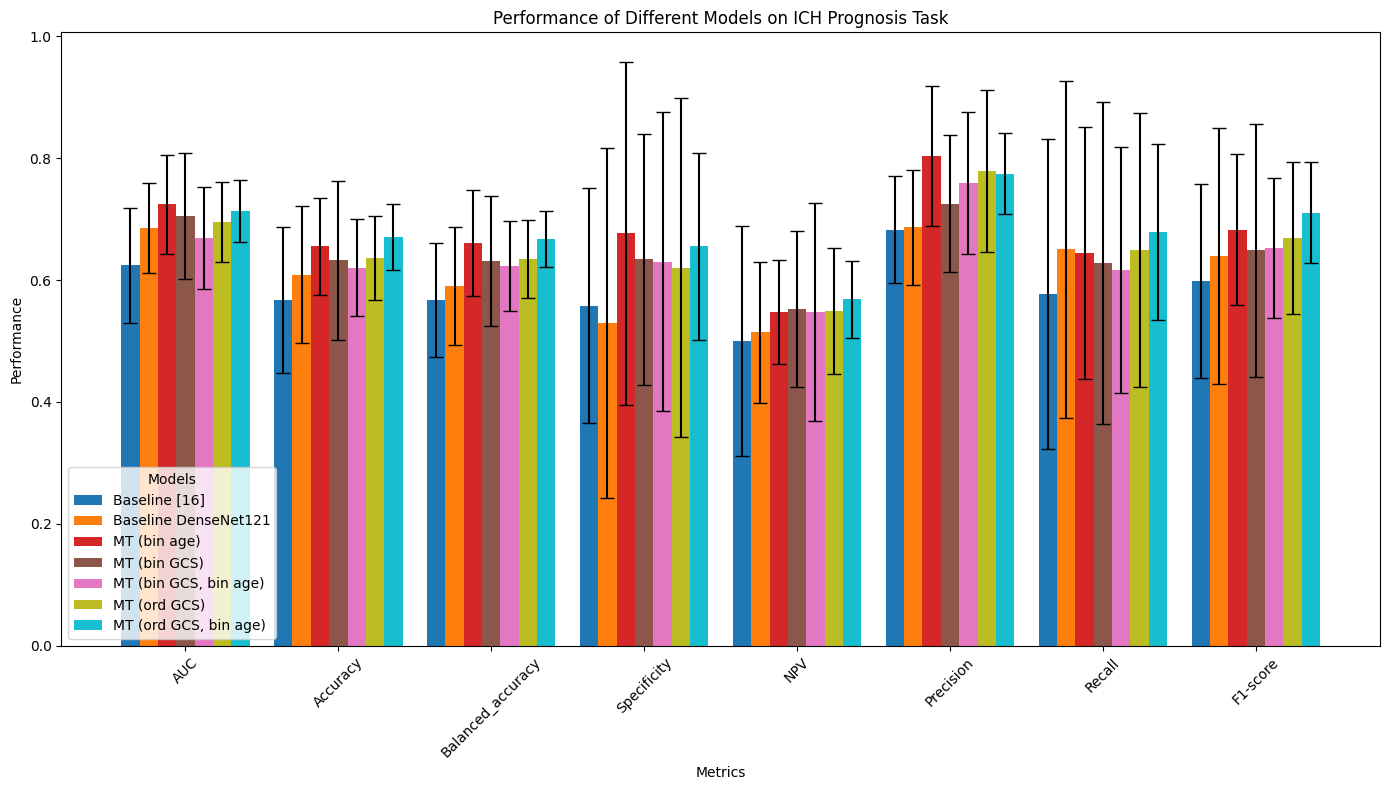

In [2]:
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.12
index = np.arange(len(metrics))

# Set color map
colors = plt.cm.get_cmap('tab10', len(models))

# Plot bars
for i, model in enumerate(mean_df.columns):
    ax.bar(index + i * bar_width, mean_df[model], bar_width, yerr=std_df[model], capsize=5, label=model, color=colors(i))

# Set labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Performance')
ax.set_title('Performance of Different Models on ICH Prognosis Task')
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, rotation=45)
ax.legend(title='Models')

plt.tight_layout()
plt.show()


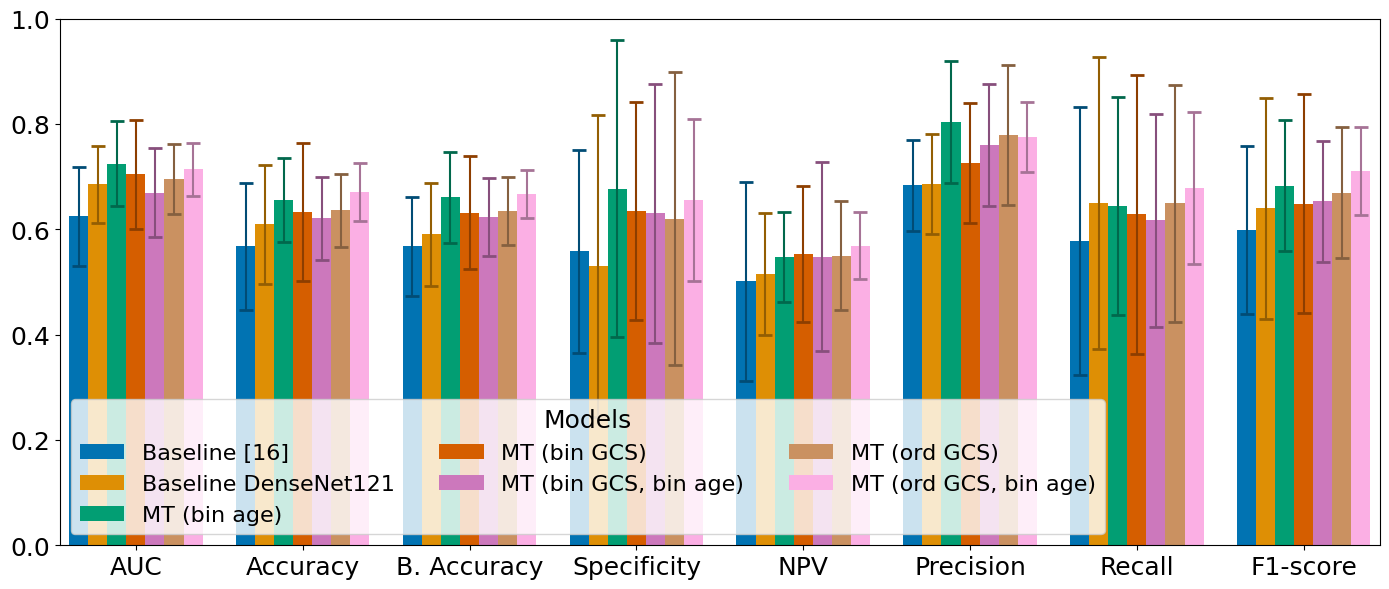

In [4]:
import seaborn as sns 
import os
from matplotlib.colors import to_rgb, to_hex
# Plot the performance of each model in a grouped bar plot with error bars
def darken_color(color, amount=0.5):
    """
    Darkens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.
    
    Examples:
    >> darken_color('blue', 0.3)
    >> darken_color('#F034A3', 0.6)
    >> darken_color((.3,.55,.1), 0.5)
    """
    try:
        c = np.array(to_rgb(color))
        return to_hex(c * (1 - amount))
    except ValueError:
        raise ValueError("Invalid color format")

fig, ax = plt.subplots(figsize=(14, 6)) # figsize=(14, 7)

bar_width = 0.12
index = np.arange(len(metrics)) * 1.05  # Increased space between groups

# Set color palette using seaborn
colors = sns.color_palette("colorblind", len(models))

# Plot bars
for i, model in enumerate(mean_df.columns):
    bars = ax.bar(index + i * bar_width, mean_df[model], bar_width, label=model, color=colors[i])
    dark_color = darken_color(colors[i], 0.34)
    ax.errorbar(index + i * bar_width, mean_df[model], yerr=std_df[model], fmt='none', ecolor=dark_color, capsize=5, capthick=2)

# Rename the first two metrics
metrics_labels = ['AUC', 'Accuracy', 'B. Accuracy', 'Specificity', 'NPV', 'Precision', 'Recall', 'F1-score']

# Set labels and title
# ax.set_xlabel('Metrics', fontsize=16)
# ax.set_ylabel('Performance', fontsize=16)
# ax.set_title('Performance of Different Models on ICH Prognosis Task', fontsize=18)
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics_labels, fontsize=18) # add rotation=45, if you want to rotate
ax.legend(title='Models', fontsize=16, title_fontsize=18, loc='lower left', ncol=3)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=18)

# Adjust x-axis limits to reduce space on the sides
plt.xlim([min(index) - bar_width, max(index + bar_width * len(models))])
plt.ylim([0, 1])

# Reduce white space on the sides
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

plt.tight_layout()
plt.savefig(os.path.join('/home/ubuntu/tenerife/miriam/ICH_Prog_MultiTaskLearning/printFigures', 'ablation_study.pdf'), bbox_inches="tight")
plt.show()